In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [25]:
x = np.array(range(1,100))
w = 4*np.pi/len(x)
w_x = del_w*x
cos_x = np.cos(w*x)
sin_x = np.cos(w*x - np.pi/2.)

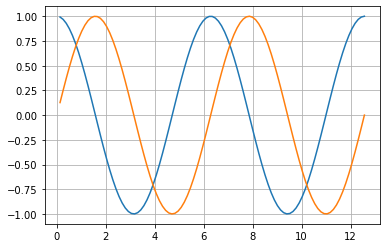

In [27]:
plt.plot(w_x,cos_x)
plt.plot(w_x,sin_x)
plt.grid()

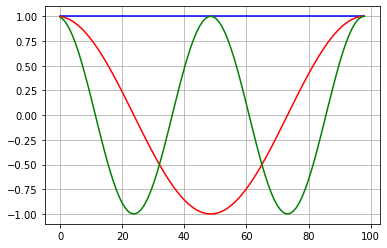

In [32]:
w=0*2*np.pi/len(x)
cos_x_0 = np.cos(w*x)
w=1*2*np.pi/len(x)
cos_x_1 = np.cos(w*x)
w=2*2*np.pi/len(x)
cos_x_2 = np.cos(w*x)

plt.plot(cos_x_0,'b')
plt.plot(cos_x_1,color='red')
plt.plot(cos_x_2,color='green')
plt.grid()

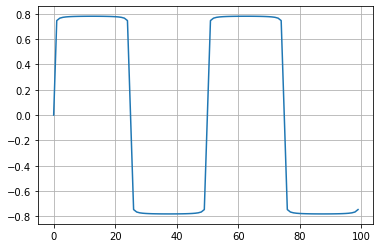

In [60]:
x = np.array(range(0,100))
w_i = 4*np.pi/len(x)


max_harmonics = 100

sum_cos = np.zeros(len(x))
for i in range(1,max_harmonics+1,2):
    coef = 1./i
    w = w_i*i
    sum_cos = sum_cos+coef*np.sin(w*x)

plt.plot(sum_cos)
plt.grid()
    

    
    


In [169]:
def make_horizontal_image(w,width,height):
    x = np.array(range(0,width))
    w_i = 2*np.pi/len(x)
    row = np.cos(w*w_i*x)
    x2d = row

    i=0
    while i <(height-1):
        x2d = np.vstack((x2d,row))
        i += 1
        
    x2d = (x2d + 1)/2
    return x2d

def make_vertical_image(w,width,height):
    x = np.array(range(0,height))
    w_i = 2*np.pi/len(x)
    row = np.cos(w*w_i*x)
    #row = row.T
    row = np.reshape(row,(height,-1))
    x2d = row

    i=0
    while i <(width-1):
        x2d = np.hstack((x2d,row))
        i += 1
        
    x2d = (x2d + 1)/2
    return x2d

In [185]:
h0 = make_horizontal_image(0,100,100)
h2 = make_horizontal_image(2,100,100)
h40 = make_horizontal_image(40,100,100)
#np.max(x2d)


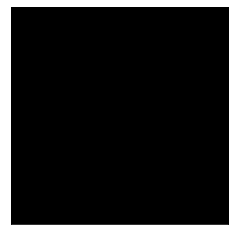

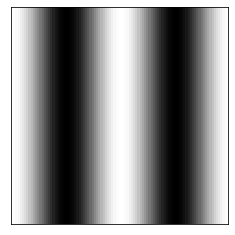

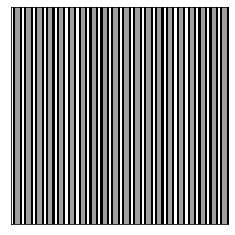

In [193]:
plt.figure()
plt.xticks([])
plt.yticks([])
plt.imshow(h0,cmap='gray')
plt.figure()
plt.xticks([])
plt.yticks([])
plt.imshow(h2,cmap='gray')
plt.figure()
plt.xticks([])
plt.yticks([])
plt.imshow(h40,cmap='gray')

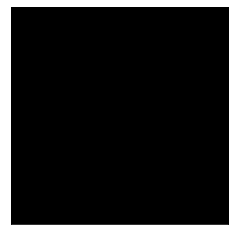

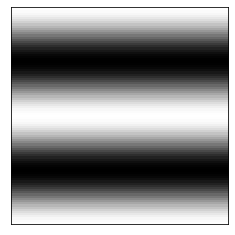

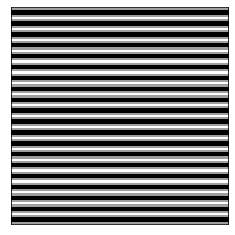

In [194]:
v0 = make_vertical_image(0,100,100)
v2 = make_vertical_image(2,100,100)
v20 = make_vertical_image(20,100,100)
plt.figure()
plt.xticks([])
plt.yticks([])
plt.imshow(v0,cmap='gray')
plt.figure()
plt.xticks([])
plt.yticks([])
plt.imshow(v2,cmap='gray')
plt.figure()
plt.xticks([])
plt.yticks([])
plt.imshow(v20,cmap='gray')

In [173]:
v4.shape

(100, 100)

In [196]:
def display_dft(dft):
    shifted = np.fft.fftshift(dft,axes=[0,1])
    magnitude = cv2.magnitude(shifted[:,:,0], shifted[:,:,1])
    #magnitude = np.sqrt(shifted[:,:,0]**2 +shifted[:,:,1]**2 )
    log_magnitude = np.log(magnitude.clip(min=0.0001))
    log_magnitude[log_magnitude==-np.inf]=0
    #print(np.max(magnitude))
    #print(np.where(magnitude==np.max(magnitude)))
    plt.figure()
    plt.axis('off')
    plt.imshow(log_magnitude, cmap = 'gray')
    plt.tight_layout()
    plt.show()
    

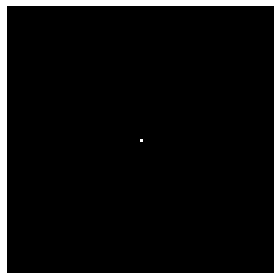

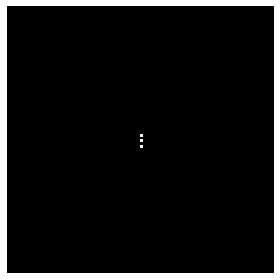

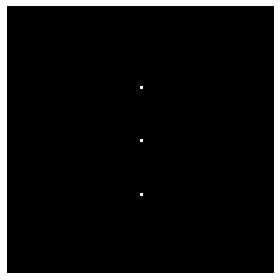

In [197]:
#print('DC')
dft = cv2.dft(v0,flags=cv2.DFT_COMPLEX_OUTPUT)
display_dft(dft)

#print('vertical : w=2')
dft = cv2.dft(v2,flags=cv2.DFT_COMPLEX_OUTPUT)
display_dft(dft)

#print('vertical : w=20')
dft = cv2.dft(v20,flags=cv2.DFT_COMPLEX_OUTPUT)
display_dft(dft)

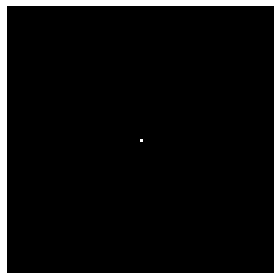

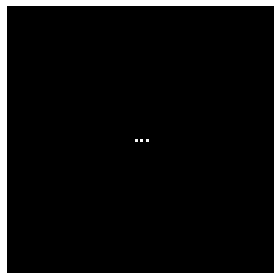

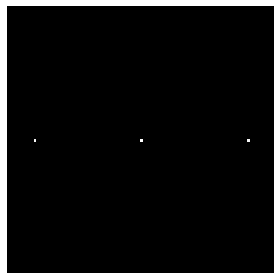

In [198]:
#print('DC')
dft = cv2.dft(h0,flags=cv2.DFT_COMPLEX_OUTPUT)
display_dft(dft)

#print('horizontal : w=2')
dft = cv2.dft(h2,flags=cv2.DFT_COMPLEX_OUTPUT)
display_dft(dft)

#print('horizontal : w=40')
dft = cv2.dft(h40,flags=cv2.DFT_COMPLEX_OUTPUT)
display_dft(dft)

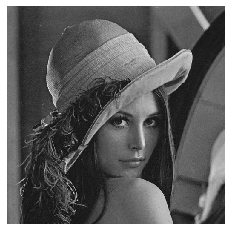

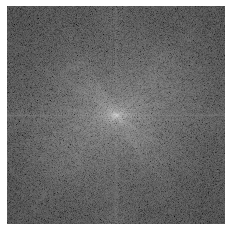

In [210]:
img = cv2.imread('../images/lena.png')
img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
img = img.astype(np.float)

dft = cv2.dft(img,flags=cv2.DFT_COMPLEX_OUTPUT)
shifted = np.fft.fftshift(dft, axes=[0,1])
magnitude = cv2.magnitude(shifted[:,:,0],shifted[:,:,1])
log_magnitude = np.log(magnitude)

plt.figure()
plt.axis('off')
plt.imshow(img,cmap='gray')

plt.figure()
plt.axis('off')
plt.imshow(log_magnitude, cmap='gray')


In [202]:
?cv2.imread
?cv2.magnitude

Docstring:
magnitude(x, y[, magnitude]) -> magnitude
.   @brief Calculates the magnitude of 2D vectors.
.   
.   The function cv::magnitude calculates the magnitude of 2D vectors formed
.   from the corresponding elements of x and y arrays:
.   \f[\texttt{dst} (I) =  \sqrt{\texttt{x}(I)^2 + \texttt{y}(I)^2}\f]
.   @param x floating-point array of x-coordinates of the vectors.
.   @param y floating-point array of y-coordinates of the vectors; it must
.   have the same size as x.
.   @param magnitude output array of the same size and type as x.
.   @sa cartToPolar, polarToCart, phase, sqrt
Type:      builtin_function_or_method
